### StarAgile Assignment on Convolution Neural Networks - Level 2
### Assignment Submitted by VINAY M on 18-09-2023

- Build a Binary Image classification using CNN on Cats and Dogs data set.

- Download dataset using below link:
- https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
- What Kind Of Approach You Could Follow for your Problem Statements :

- Reading the Data, Understanding the Data, Exploratory Data Analysis, Splitting the Data, Training and Testing, Modeling, Accuracy

- Hints provided are only for your references or getting started. You’re free to use your own methodology to work on your assignments.

In [1]:
# There were a two folders 1. Train and 2. Validation
# Data names are not clean
# all validation data moved to Train folders and renaming performed using following code starting with 1001

In [2]:
# Due to lack of Hardware resource, training done on Google Colab

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
#Mypath
#/content/drive/MyDrive/DS_Datasets/Cat_Dog_Classification/

In [5]:
#Import / Installing Important Libraries
import tensorflow as tf
import os

In [6]:
#Remove Dodgy Images
import cv2
import imghdr

In [7]:
data_path = '/content/drive/MyDrive/DS_Datasets/Cat_Dog_Classification/'

In [8]:
image_ext_required = ['jpeg','jpg','bmp','png']

In [9]:
for image_class in os.listdir(data_path):
    for image in os.listdir(os.path.join(data_path, image_class)):
        img_path = os.path.join(data_path, image_class, image)

    try:
        img = cv2.imread(img_path)
        tip = imghdr.what(img_path)
        if tip not in image_ext_required:
            print("Image is not of desired extention", format(image_path))
            os.remove(image_path)
    except Exception as e:
        print("Issue with the image")
        os.remove(image_path)

In [10]:
#Loading of Training Data
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory(data_path)

Found 3000 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

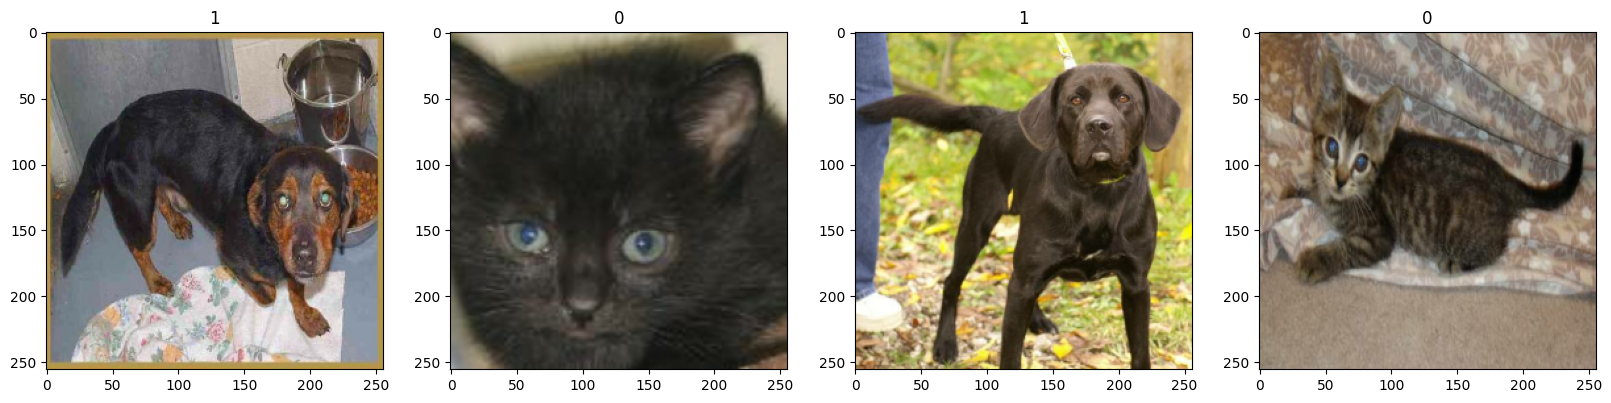

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [15]:
data = data.map(lambda x,y:(x/255,y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[0.48699448, 0.23209253, 0.08307292],
          [0.49883577, 0.23745404, 0.08627451],
          [0.5094822 , 0.24281557, 0.08987439],
          ...,
          [0.6924479 , 0.45323223, 0.2061734 ],
          [0.7194087 , 0.48019302, 0.2331342 ],
          [0.70879346, 0.46957785, 0.22251901]],
 
         [[0.48710936, 0.23220742, 0.08295803],
          [0.4988874 , 0.23750566, 0.0862229 ],
          [0.50958765, 0.24292102, 0.08997985],
          ...,
          [0.6924385 , 0.4532228 , 0.2059342 ],
          [0.719397  , 0.48018134, 0.23289274],
          [0.71207875, 0.47286305, 0.22557445]],
 
         [[0.49091604, 0.2360141 , 0.07915135],
          [0.5007029 , 0.23932116, 0.08461833],
          [0.51309776, 0.24643114, 0.09348997],
          ...,
          [0.6921262 , 0.45291054, 0.19800858],
          [0.7190104 , 0.47979474, 0.22489277],
          [0.71604174, 0.47682607, 0.2219241 ]],
 
         ...,
 
         [[0.40163144, 0.16241574, 0.04941023],
          [0.41667

In [17]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [18]:
train_size

65

In [19]:
val_size

18

In [20]:
test_size

9

In [21]:
train = data.take(train_size)
test = data.skip(train_size).take(test_size)
val = data.skip(train_size+test_size).take(val_size)

In [22]:
# Train our CNN model on Training Dataset

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()
model.add(Conv2D(16,(3,3),1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
#1 = stride
#16 = filters
#3,3 = filter dimension

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [27]:
# Model Training
logdir='logs'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
from keras import callbacks
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
65/65 [==============================] - 204s 3s/step - loss: 0.6704 - accuracy: 0.5822 - val_loss: 0.6182 - val_accuracy: 0.6441
Epoch 2/30
65/65 [==============================] - 200s 3s/step - loss: 0.5960 - accuracy: 0.6817 - val_loss: 0.6183 - val_accuracy: 0.6545
Epoch 3/30
65/65 [==============================] - 200s 3s/step - loss: 0.5409 - accuracy: 0.7226 - val_loss: 0.5970 - val_accuracy: 0.6771
Epoch 4/30
65/65 [==============================] - 186s 3s/step - loss: 0.4685 - accuracy: 0.7817 - val_loss: 0.6137 - val_accuracy: 0.7118
Epoch 5/30
65/65 [==============================] - 201s 3s/step - loss: 0.3935 - accuracy: 0.8192 - val_loss: 0.5497 - val_accuracy: 0.7309
Epoch 6/30
65/65 [==============================] - 199s 3s/step - loss: 0.3282 - accuracy: 0.8582 - val_loss: 0.6171 - val_accuracy: 0.7274
Epoch 7/30
65/65 [==============================] - 185s 3s/step - loss: 0.2511 - accuracy: 0.8947 - val_loss: 0.6795 - val_accuracy: 0.6962
Epoch 8/30
65

In [29]:
#Plotting the performance - Training Accuracy and Validation Accuracy

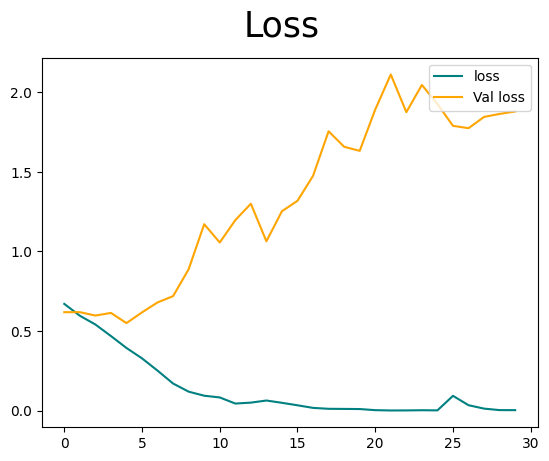

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='Val loss')
fig.suptitle("Loss", fontsize=25)
plt.legend(loc='upper right')
plt.show()

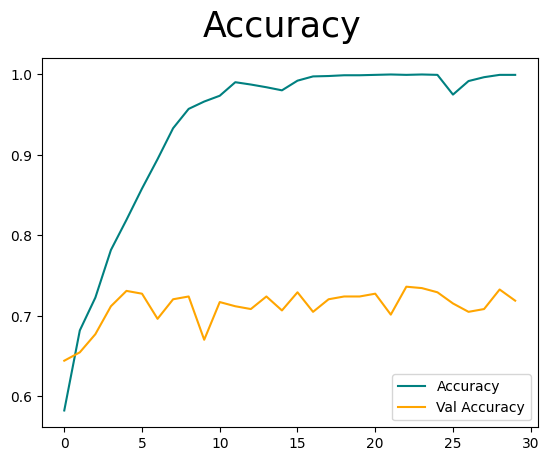

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='Accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='Val Accuracy')
fig.suptitle("Accuracy", fontsize=25)
plt.legend(loc='lower right')
plt.show()

In [32]:
#Evaluate
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [33]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [34]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 1s 560ms/step


In [35]:
print("Precision", pre.result().numpy())
print("Accuracy", acc.result().numpy())
print("Recall", re.result().numpy())

Precision 0.8618421
Accuracy 0.8541667
Recall 0.8618421


In [36]:
# Testing Model
img = cv2.imread('/content/drive/MyDrive/DS_Datasets/trial_image.jpg')

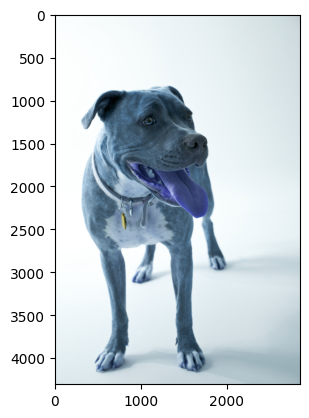

In [37]:
plt.imshow(img)
plt.show()

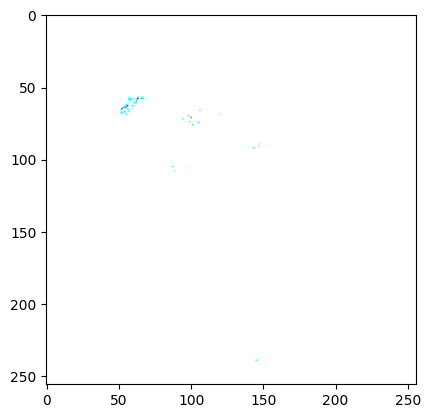

In [38]:
resized = tf.image.resize(img, (256,256))
plt.imshow(resized)
plt.show()

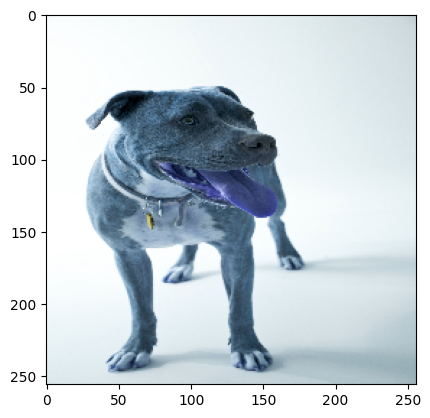

In [39]:
#resize
resized = tf.image.resize(img, (256,256))
plt.imshow(resized.numpy().astype(int))
plt.show()

In [40]:
feed = np.expand_dims(resized/255,0)
yhat = model.predict(feed)

1/1 [==============================] - 0s 114ms/step


In [41]:
yhat

array([[0.9999955]], dtype=float32)

In [42]:
if yhat < 0.5:
    print("The predicted class is Cat")
else:
    print("The predicted class is Dog")

The predicted class is Dog


In [43]:
# Saving Model
from tensorflow.keras.models import load_model
model.save(os.path.join("/content/drive/MyDrive/DS_Datasets/Cat_Dog_Classification/Model",'CatDogclassifier.h5'))

In [44]:
new_model = load_model('/content/drive/MyDrive/DS_Datasets/Cat_Dog_Classification/Model/CatDogclassifier.h5')

In [45]:
new_prediction = new_model.predict(feed)

1/1 [==============================] - 0s 454ms/step


In [46]:
if new_prediction < 0.5:
    print("The predicted class is Cat")
else:
    print("The predicted class is Dog")

The predicted class is Dog


In [47]:
# END OF CNN Modelling

In [48]:
# Assignment Submitted by VINAY M on 18-09-2023